In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_tsne = pd.read_parquet('data/results/df_tsne.parquet')
df_tsne.head()

,PC1,PC2,Label
0,0.967406,-69.693619,NetBIOS
1,78.376030,-15.459142,LDAP
2,43.559002,-40.516380,NetBIOS
3,64.666115,22.998545,LDAP
4,64.986031,22.281092,LDAP


In [12]:
# count unique labels
df_tsne['Label'].value_counts()

Benign           8836
LDAP             1884
DrDoS_LDAP       1440
NetBIOS           644
DrDoS_NetBIOS     598
Name: Label, dtype: int64

In [13]:
# import kmeans
from sklearn.cluster import KMeans

# create kmeans object
kmeans = KMeans(n_clusters=5, n_init=10, random_state=123)

# fit kmeans object to data
kmeans.fit(df_tsne[['PC1', 'PC2']])

# print location of clusters learned by kmeans object
print(kmeans.cluster_centers_)

[[-14.490241   49.583996 ]
 [ 19.952267   21.726423 ]
 [ -7.4012156 -40.75759  ]
 [ 51.150948  -12.690748 ]
 [-49.33083     1.7800745]]


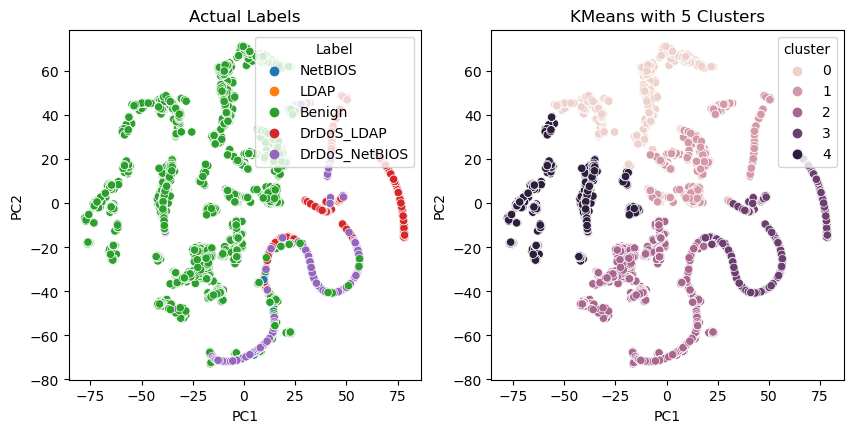

In [18]:
# plot the data and the clusters learned
df_tsne['cluster'] = kmeans.labels_
fig = plt.figure(figsize=(10, 10))
plt.subplot(221)
sns.scatterplot(x='PC1', y='PC2', hue='Label', data=df_tsne)
plt.title('Actual Labels')
plt.subplot(222)
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=df_tsne)
plt.title('KMeans with 5 Clusters')
plt.show()

We can see that k-means is not able to separate the data into the correct clusters. This is because the shape of the k-means' clusters is always spherical, and it looks for clusters of equal variance, which in this case, is not the case.